### Stock Market Prediction And Forecasting Using Stacked LSTM

In [121]:
### Keras and Tensorflow >2.0

In [ ]:
import requests
import pandas as pd

# Replace with your actual Tiingo API key
key = "3b87e110f29a68341410d31c05b1cb6e42ac5164"

# Define start and end dates
start_date = "2020-01-01"  # Change to your desired start date
end_date = "2023-12-31"    # Change to your desired end date

# Fetch data directly from Tiingo with date filters
url = f"https://api.tiingo.com/tiingo/daily/AAPL/prices?startDate={start_date}&endDate={end_date}&token={key}"
response = requests.get(url)

# Convert response to DataFrame
if response.status_code == 200:
    data = response.json()
    df = pd.DataFrame(data)
    print(df.head())
else:
    print(f"Error: {response.status_code}, {response.text}")

In [123]:
df.to_csv('AAPL.csv')

In [124]:
import pandas as pd

In [125]:
df=pd.read_csv('AAPL.csv')

In [126]:
df.head()

,Unnamed: 0,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,2020-01-02T00:00:00.000Z,300.35,300.60,295.19,296.24,33911864,72.797293,72.857887,71.546639,71.801132,135647456,0.0,1.0
1,1,2020-01-03T00:00:00.000Z,297.43,300.58,296.50,297.15,36633878,72.089558,72.853039,71.864150,72.021693,146535512,0.0,1.0
2,2,2020-01-06T00:00:00.000Z,299.80,299.96,292.75,293.79,29644644,72.663987,72.702767,70.955244,71.207314,118578576,0.0,1.0
3,3,2020-01-07T00:00:00.000Z,298.39,300.90,297.48,299.84,27877655,72.322238,72.930599,72.101677,72.673682,111510620,0.0,1.0
4,4,2020-01-08T00:00:00.000Z,303.19,304.44,297.16,297.16,33090946,73.485638,73.788606,72.024117,72.024117,132363784,0.0,1.0


In [127]:
df.tail()

,Unnamed: 0,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1001,1001,2023-12-22T00:00:00.000Z,193.60,195.41,192.970,195.18,37149570,192.656691,194.457872,192.029760,194.228992,37149570,0.0,1.0
1002,1002,2023-12-26T00:00:00.000Z,193.05,193.89,192.830,193.61,28919310,192.109371,192.945278,191.890442,192.666642,28919310,0.0,1.0
1003,1003,2023-12-27T00:00:00.000Z,193.15,193.50,191.090,192.49,47899806,192.208883,192.557178,190.158921,191.552099,47899806,0.0,1.0
1004,1004,2023-12-28T00:00:00.000Z,193.58,194.66,193.170,194.14,34049898,192.636788,193.711526,192.228786,193.194060,34049898,0.0,1.0
1005,1005,2023-12-29T00:00:00.000Z,192.53,194.40,191.725,193.90,42672148,191.591904,193.452793,190.790827,192.955229,42672148,0.0,1.0


In [128]:
df1=df.reset_index()['close']

In [129]:
df1

,close
0,300.35
1,297.43
2,299.80
3,298.39
4,303.19
...,...
1001,193.60
1002,193.05
1003,193.15
1004,193.58


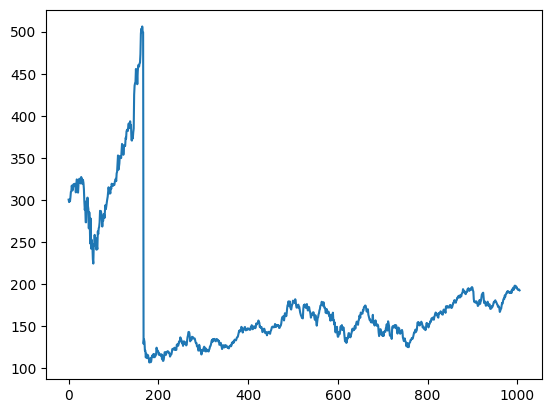

In [130]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [131]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler

In [132]:
import numpy as np

In [133]:
df1

,close
0,300.35
1,297.43
2,299.80
3,298.39
4,303.19
...,...
1001,193.60
1002,193.05
1003,193.15
1004,193.58


In [134]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [135]:
print(df1)

[[0.48468378]
 [0.47737007]
 [0.4833062 ]
 ...
 [0.21618034]
 [0.21725736]
 [0.21462743]]


In [136]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [137]:
training_size,test_size

(653, 353)

In [ ]:
train_data

In [139]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [140]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [141]:
print(X_train.shape), print(y_train.shape)

(552, 100)
(552,)


(None, None)

In [142]:
print(X_test.shape), print(ytest.shape)

(252, 100)
(252,)


(None, None)

In [143]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [144]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [145]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [146]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 100, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_8 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [147]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 100, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_8 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

In [149]:
import tensorflow as tf

In [150]:
tf.__version__

'2.17.1'

In [151]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


In [152]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [153]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

191.11735045363346

In [154]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

167.84921839501277

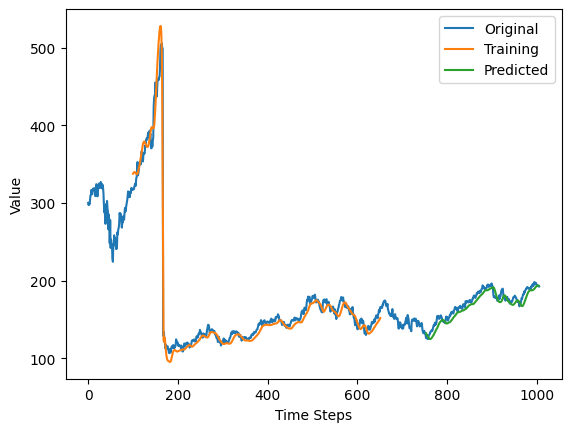

In [155]:
### Plotting
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1),label='Original')
plt.plot(trainPredictPlot, label='Training')
plt.plot(testPredictPlot, label='Predicted')

plt.xlabel('Time Steps')
plt.ylabel('Value')

plt.legend()

plt.show()



In [156]:
len(test_data)

353

In [162]:
x_input=test_data[253:].reshape(1,-1)       #len(test_data) - 100 at start
x_input.shape

x_input=test_data[len(test_data)-100:].reshape(1,-1)       #len(test_data) - 100 at start
x_input.shape

(1, 100)

In [163]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [164]:
temp_input

[0.1787100814026299,
 0.17815904821540385,
 0.17770820288040068,
 0.18189104571070758,
 0.1768566061365059,
 0.1746524733876017,
 0.16821540388227924,
 0.16944270507200998,
 0.17282404508453347,
 0.17630557294927984,
 0.18604884157795865,
 0.17417658108954281,
 0.17976205385097055,
 0.18371947401377575,
 0.1935629304946775,
 0.20240450845335,
 0.20295554164057605,
 0.20693800876643703,
 0.20753913587977452,
 0.19053224796493418,
 0.1771321227301189,
 0.17868503443957418,
 0.18164057608015027,
 0.17397620538509706,
 0.16874139010644956,
 0.17257357545397617,
 0.17074514715090788,
 0.17815904821540385,
 0.18091421415153408,
 0.17194740137758296,
 0.16804007514088914,
 0.17019411396368184,
 0.173425172197871,
 0.16310582341891044,
 0.15927363807138384,
 0.15992485911083276,
 0.16122730118973072,
 0.16758922980588598,
 0.16420788979336254,
 0.1673638071383844,
 0.17049467752035058,
 0.17695679398872882,
 0.18071383844708827,
 0.17921102066374445,
 0.18274264245460237,
 0.1850219160926737,


In [165]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

[0.21460769]
101
1 day input [0.17815905 0.1777082  0.18189105 0.17685661 0.17465247 0.1682154
 0.16944271 0.17282405 0.17630557 0.18604884 0.17417658 0.17976205
 0.18371947 0.19356293 0.20240451 0.20295554 0.20693801 0.20753914
 0.19053225 0.17713212 0.17868503 0.18164058 0.17397621 0.16874139
 0.17257358 0.17074515 0.17815905 0.18091421 0.1719474  0.16804008
 0.17019411 0.17342517 0.16310582 0.15927364 0.15992486 0.1612273
 0.16758923 0.16420789 0.16736381 0.17049468 0.17695679 0.18071384
 0.17921102 0.18274264 0.18502192 0.18036318 0.18003757 0.1761052
 0.17282405 0.17187226 0.16541014 0.16571071 0.16681277 0.16095178
 0.15040701 0.15373826 0.15892298 0.16012523 0.16814026 0.17715717
 0.17485285 0.18131497 0.18780213 0.19048215 0.1892799  0.19927364
 0.19526612 0.20187852 0.2033062  0.20756418 0.20751409 0.21192235
 0.20989355 0.2115717  0.2082154  0.20776456 0.20929242 0.20671259
 0.20816531 0.21139637 0.20686287 0.21685661 0.21410144 0.2189856
 0.22259236 0.21625548 0.22008766 0.2

In [166]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [167]:
import matplotlib.pyplot as plt

In [168]:
len(df1)

1006

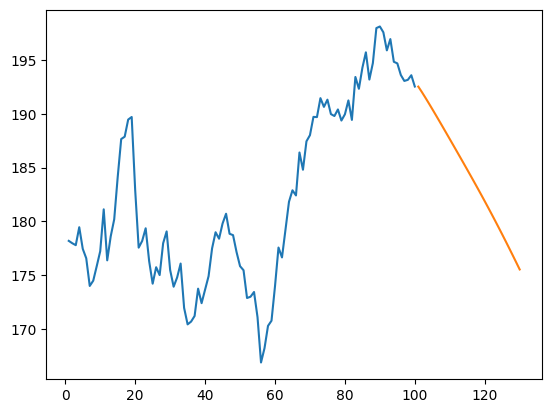

In [176]:
plt.plot(day_new,scaler.inverse_transform(df1[len(df1)-100 :]))    # len(df1) - 100 at start for next 30 days
plt.plot(day_pred,scaler.inverse_transform(lst_output))

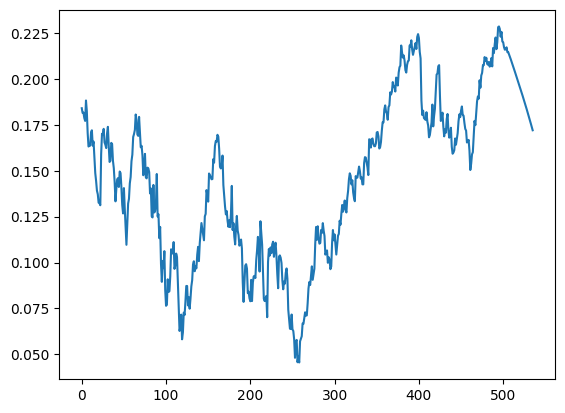

In [180]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[500:])

In [178]:
df3=scaler.inverse_transform(df3).tolist()

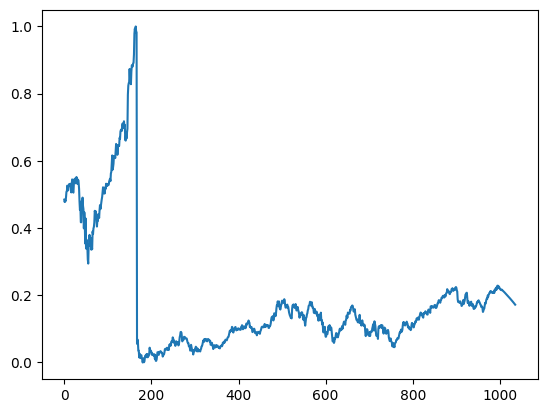

In [181]:
plt.plot(df3)